<a href="https://colab.research.google.com/github/karegapauline/Health-Environment-Data-Linking/blob/main/Articles_and_Papers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction.**

Science communication plays an important role in translation of crucial scientific results to the public. It became popular in the 19th century when it became too specialized and required translation to be understood by the public who ranged from local shopkeepers, to enthusiasts who were experts in other subjects. Initially, this 'translation' or communication was done just within a specific network or group of enthusiasts. However, science communication now, you could say, has made possible interdisciplinary research by enhancing understanding between fields. It also made possible engagement with the public or those who the results impacted most, and other stakeholders who have significant impact on the lifecycle of the research.



In [1]:
pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 561.5 kB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=01f8184662c434e56f1f85f3a5d17d744517a19ae8a9a8e3ba477e08f2250524
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [2]:
import feedparser
import pandas as pd
import time
from urllib.parse import quote_plus

# ------------------------
# CONFIGURATION
# ------------------------

SEARCH_TERMS = [
    "air pollution",
    "air quality",
    "respiratory illness",
    "respiratory disease",
    "air quality policy"
]

COUNTRY_SOURCES = {
    "Kenya": ["nation.africa", "standardmedia.co.ke", "the-star.co.ke"],
    "South Africa": ["dailymaverick.co.za", "timeslive.co.za", "news24.com"],
    "UK": ["bbc.co.uk", "theguardian.com", "telegraph.co.uk"]
}

# ------------------------
# FUNCTION TO PARSE GOOGLE RSS
# ------------------------

def fetch_articles(search_term, site):
    query = f'{search_term} site:{site}'
    encoded_query = quote_plus(query)
    url = f"https://news.google.com/rss/search?q={encoded_query}&hl=en-GB&gl=GB&ceid=GB:en"

    feed = feedparser.parse(url)
    articles = []

    for entry in feed.entries:
        articles.append({
            "search_term": search_term,
            "source_site": site,
            "title": entry.title,
            "link": entry.link,
            "published": entry.get("published", ""),
            "summary": entry.get("summary", "")
        })

    return articles

# ------------------------
# MAIN FUNCTION
# ------------------------

def scrape_google_news():
    for country, sources in COUNTRY_SOURCES.items():
        print(f"\n Scraping Google News for {country}...")
        all_records = []

        for site in sources:
            for term in SEARCH_TERMS:
                print(f"🔍 {term} @ {site}")
                articles = fetch_articles(term, site)
                all_records.extend(articles)
                time.sleep(1)  # be polite to Google servers

        # Save to CSV
        df = pd.DataFrame(all_records)
        filename = f"{country.lower().replace(' ', '_')}_gnews.csv"
        df.to_csv(filename, index=False)
        print(f"✅ Saved {len(df)} articles to {filename}")

if __name__ == "__main__":
    scrape_google_news()



 Scraping Google News for Kenya...
🔍 air pollution @ nation.africa
🔍 air quality @ nation.africa
🔍 respiratory illness @ nation.africa
🔍 respiratory disease @ nation.africa
🔍 air quality policy @ nation.africa
🔍 air pollution @ standardmedia.co.ke
🔍 air quality @ standardmedia.co.ke
🔍 respiratory illness @ standardmedia.co.ke
🔍 respiratory disease @ standardmedia.co.ke
🔍 air quality policy @ standardmedia.co.ke
🔍 air pollution @ the-star.co.ke
🔍 air quality @ the-star.co.ke
🔍 respiratory illness @ the-star.co.ke
🔍 respiratory disease @ the-star.co.ke
🔍 air quality policy @ the-star.co.ke
✅ Saved 1500 articles to kenya_gnews.csv

 Scraping Google News for South Africa...
🔍 air pollution @ dailymaverick.co.za
🔍 air quality @ dailymaverick.co.za
🔍 respiratory illness @ dailymaverick.co.za
🔍 respiratory disease @ dailymaverick.co.za
🔍 air quality policy @ dailymaverick.co.za
🔍 air pollution @ timeslive.co.za
🔍 air quality @ timeslive.co.za
🔍 respiratory illness @ timeslive.co.za
🔍 respira

In [3]:
## FITERING OF RELEVANT ARTICLES
# REMOVE DUPLICATES first
import pandas as pd

# Load your file
df = pd.read_csv("kenya_gnews.csv")
df2 = pd.read_csv("uk_gnews.csv")
df3 = pd.read_csv("south_africa_gnews.csv")

# Normalize titles
df['clean_title'] = df['title'].str.lower().str.strip()
df2['clean_title'] = df2['title'].str.lower().str.strip()
df3['clean_title'] = df3['title'].str.lower().str.strip()

# Mark duplicates
df['duplicate'] = df.duplicated(subset='clean_title', keep='first')
df2['duplicate'] = df2.duplicated(subset='clean_title', keep='first')
df3['duplicate'] = df3.duplicated(subset='clean_title', keep='first')

# Save with duplicate flag
df.to_csv("kenya_gnews_deduped.csv", index=False)

df2.to_csv("uk_gnews_deduped.csv", index=False)

df3.to_csv("south_africa_gnews_deduped.csv", index=False)

# Save only unique articles
df[~df['duplicate']].to_csv("kenya_gnews_unique.csv", index=False)

df2[~df2['duplicate']].to_csv("uk_gnews_unique.csv", index=False)

df3[~df3['duplicate']].to_csv("south_africa_gnews_unique.csv", index=False)

print(f"✅ Found and removed {df['duplicate'].sum()} duplicates.")
print(f"✅ Found and removed {df2['duplicate'].sum()} duplicates.")
print(f"✅ Found and removed {df3['duplicate'].sum()} duplicates.")




✅ Found and removed 601 duplicates.
✅ Found and removed 531 duplicates.
✅ Found and removed 556 duplicates.


In [4]:
## NOW REMOVE ALL HEADINGS THAT ARE NOT AIR QUALITY AND HEALTH RELATED
import pandas as pd

# Load your file
df = pd.read_csv("kenya_gnews_unique.csv")
df2 = pd.read_csv("uk_gnews_unique.csv")
df3 = pd.read_csv("south_africa_gnews_unique.csv")

# Filter titles that mention "air quality" or "health"
df_filtered = df[df['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
df2_filtered = df2[df2['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
df3_filtered = df3[df3['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]



# Normalize titles for deduplication
df_filtered['clean_title'] = df_filtered['title'].str.lower().str.strip()
df2_filtered['clean_title'] = df2_filtered['title'].str.lower().str.strip()
df3_filtered['clean_title'] = df3_filtered['title'].str.lower().str.strip()

# Mark exact duplicates
df_filtered['duplicate'] = df_filtered.duplicated(subset='clean_title', keep='first')
df2_filtered['duplicate'] = df2_filtered.duplicated(subset='clean_title', keep='first')
df3_filtered['duplicate'] = df3_filtered.duplicated(subset='clean_title', keep='first')

# Save filtered and deduplicated articles
df_filtered.to_csv("kenya_gnews_filtered_deduped.csv", index=False)
df2_filtered.to_csv("uk_gnews_filtered_deduped.csv", index=False)
df3_filtered.to_csv("south_africa_gnews_filtered_deduped.csv", index=False)

# Save only unique ones
df_filtered[~df_filtered['duplicate']].to_csv("kenya_gnews_filtered_unique.csv", index=False)
df2_filtered[~df2_filtered['duplicate']].to_csv("uk_gnews_filtered_unique.csv", index=False)
df3_filtered[~df3_filtered['duplicate']].to_csv("south_africa_gnews_filtered_unique.csv", index=False)

print(f"✅ Filtered to {len(df_filtered)} relevant articles, removed {df_filtered['duplicate'].sum()} duplicates.")
print(f"✅ Filtered to {len(df2_filtered)} relevant articles, removed {df2_filtered['duplicate'].sum()} duplicates.")
print(f"✅ Filtered to {len(df3_filtered)} relevant articles, removed {df3_filtered['duplicate'].sum()} duplicates.")




✅ Filtered to 122 relevant articles, removed 0 duplicates.
✅ Filtered to 179 relevant articles, removed 0 duplicates.
✅ Filtered to 150 relevant articles, removed 0 duplicates.


/tmp/ipython-input-2831715560.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
/tmp/ipython-input-2831715560.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df2_filtered = df2[df2['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | diseases | breathing | cities | environmental |health)\b', case=False, na=False)]
/tmp/ipython-input-2831715560.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3_filtered = df3[df3['title'].str.contains(r'\b(air quality| pollution | cooking | electric | climate | disea

In [5]:
##EXPLORE ARTICLES AND RESULLTS
filtered_ke =  pd.read_csv("kenya_gnews_filtered_unique.csv")
filtered_uk =  pd.read_csv("uk_gnews_filtered_unique.csv")
filtered_sa =  pd.read_csv("south_africa_gnews_filtered_unique.csv")

filtered_uk



,search_term,source_site,title,link,published,summary,clean_title,duplicate
0,air pollution,bbc.co.uk,High pollution warning issued for London by Ci...,https://news.google.com/rss/articles/CBMiXEFVX...,"Tue, 12 Aug 2025 05:23:40 GMT","<a href=""https://news.google.com/rss/articles/...",high pollution warning issued for london by ci...,False
1,air pollution,bbc.co.uk,"Air pollution link to higher dementia risk, st...",https://news.google.com/rss/articles/CBMiXEFVX...,"Fri, 25 Jul 2025 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...","air pollution link to higher dementia risk, st...",False
2,air pollution,bbc.co.uk,Canadian wildfires prompt New York air quality...,https://news.google.com/rss/articles/CBMiXEFVX...,"Sat, 26 Jul 2025 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",canadian wildfires prompt new york air quality...,False
3,air pollution,bbc.co.uk,How hot weather can make air pollution worse -...,https://news.google.com/rss/articles/CBMiWkFVX...,"Tue, 12 Aug 2025 15:10:54 GMT","<a href=""https://news.google.com/rss/articles/...",how hot weather can make air pollution worse -...,False
4,air pollution,bbc.co.uk,"Air pollution levels falling in the UK, say sc...",https://news.google.com/rss/articles/CBMiY0FVX...,"Wed, 16 Jul 2025 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...","air pollution levels falling in the uk, say sc...",False
...,...,...,...,...,...,...,...,...
174,air quality policy,telegraph.co.uk,Calls for wood-burning stoves to come with hea...,https://news.google.com/rss/articles/CBMihwFBV...,"Fri, 22 Dec 2023 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",calls for wood-burning stoves to come with hea...,False
175,air quality policy,telegraph.co.uk,Revealed: How Volkswagen-funded car diesel stu...,https://news.google.com/rss/articles/CBMiswFBV...,"Fri, 02 Feb 2018 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",revealed: how volkswagen-funded car diesel stu...,False
176,air quality policy,telegraph.co.uk,Sadiq Khan to impose congestion charge on elec...,https://news.google.com/rss/articles/CBMiowFBV...,"Tue, 02 Jul 2024 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",sadiq khan to impose congestion charge on elec...,False
177,air quality policy,telegraph.co.uk,XR billionaire funds Khan climate network - Th...,https://news.google.com/rss/articles/CBMiiwFBV...,"Sat, 11 Nov 2023 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",xr billionaire funds khan climate network - th...,False


In [16]:
# -------------------------------
# STEP 1: Concatenate articles
# -------------------------------

df_kenya = load_and_tag("kenya_gnews.csv", "Kenya")
df_sa = load_and_tag("south_africa_gnews.csv", "South Africa")
df_uk = load_and_tag("uk_gnews.csv", "UK")

df_all = pd.concat([df_kenya, df_sa, df_uk], ignore_index=True)
df_all = df_all[df_all['title'].notna()].copy()

# -------------------------------
# STEP 2: Preprocess Titles
# -------------------------------
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower()
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df_all['clean_title'] = df_all['title'].apply(clean_text)


# -------------------------------
# STEP 3: Save Output
# -------------------------------
df_all.to_csv("all_countries_grouped_articles.csv", index=False)
print("\n✅ Saved grouped articles to 'all_countries_grouped_articles.csv'")

all_countries_grouped_articles = pd.read_csv("all_countries_grouped_articles.csv")
all_countries_grouped_articles


✅ Saved grouped articles to 'all_countries_grouped_articles.csv'


,search_term,source_site,title,link,published,summary,country,clean_title
0,air pollution,nation.africa,Breathing air of death: Coal dust pollution pl...,https://news.google.com/rss/articles/CBMisAFBV...,"Sun, 07 Jan 2024 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",Kenya,breathing air death coal dust pollution plague...
1,air pollution,nation.africa,Environmentalists raise concern as air polluti...,https://news.google.com/rss/articles/CBMixgFBV...,"Tue, 23 Jul 2024 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",Kenya,environmentalists raise concern air pollution ...
2,air pollution,nation.africa,Pollution: What will the world be like for fut...,https://news.google.com/rss/articles/CBMimAFBV...,"Thu, 15 Apr 2021 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",Kenya,pollution world like future generations daily ...
3,air pollution,nation.africa,Here comes Kenya's first locally assembled ele...,https://news.google.com/rss/articles/CBMinwFBV...,"Wed, 04 Oct 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",Kenya,comes kenyas first locally assembled electric ...
4,air pollution,nation.africa,"Africa and Asia worst hit by air pollution, WH...",https://news.google.com/rss/articles/CBMipgFBV...,"Fri, 03 Jul 2020 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",Kenya,africa asia worst hit air pollution study show...
...,...,...,...,...,...,...,...,...
4495,air quality policy,telegraph.co.uk,Ultra low emission zones: Angela Rayner admits...,https://news.google.com/rss/articles/CBMinwFBV...,"Fri, 21 Jul 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",UK,ultra low emission zones angela rayner admits ...
4496,air quality policy,telegraph.co.uk,The Great Smog of London: the air was thick wi...,https://news.google.com/rss/articles/CBMiugFBV...,"Thu, 06 Dec 2012 08:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",UK,great smog london air thick apathy telegraph
4497,air quality policy,telegraph.co.uk,Met Police could be given Ulez cameras to use ...,https://news.google.com/rss/articles/CBMiqAFBV...,"Wed, 22 Mar 2023 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",UK,met police could given ulez cameras use law en...
4498,air quality policy,telegraph.co.uk,Ice-cream vans and parents in cars could be ba...,https://news.google.com/rss/articles/CBMisAFBV...,"Fri, 30 Jun 2017 07:00:00 GMT","<a href=""https://news.google.com/rss/articles/...",UK,icecream vans parents cars could banned idling...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Load data
df = pd.read_csv("all_countries_grouped_articles.csv")
df['published'] = pd.to_datetime(df['published'], errors='coerce')
df['year'] = df['published'].dt.year

# Classification function (tweaked for your 3 countries)
def classify_article(title):
    t = title.lower()
    if 'pollution' in t:
        return 'Pollution'
    elif 'air quality' in t:
        return 'Air Quality'
    elif 'health' in t or 'disease' in t or 'mortality' in t:
        return 'Health Impact'
    elif 'climate' in t:
        return 'Climate Change'
    elif 'vehicle' in t or 'transport' in t or 'bus' in t or 'ulez' in t:
        return 'Transport'
    elif 'cooking' in t or 'fuel' in t or 'stove' in t:
        return 'Household Energy'
    elif 'waste' in t or 'burning' in t:
        return 'Waste Management'
    else:
        return 'Other'

df['category'] = df['clean_title'].apply(classify_article)

# Calculate overall category order
overall_category_counts = df['category'].value_counts()
category_order = overall_category_counts.index.tolist()

# ====== EXPORT STEP ======
# Save sorted overall counts
overall_category_counts.to_csv("overall_category_counts.csv")

# Save per-country counts sorted by category order
country_category_counts = (
    df.groupby(['country', 'category'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=category_order)
)
country_category_counts.to_csv("category_counts_per_country.csv")

# Save per-country percentages
category_percentages_per_country = (
    country_category_counts.div(country_category_counts.sum(axis=1), axis=0) * 100
)
category_percentages_per_country.to_csv("category_percentages_per_country.csv")

# ====== VISUALIZATION SETTINGS ======
sns.set_theme(style="whitegrid")
country_palette = {
    "Kenya": "#1b9e77",
    "South Africa": "#d95f02",
    "UK": "#7570b3"
}

# 1️⃣ Stacked bar plots per country over years
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    yearly_trends = (
        country_data.groupby(['year', 'category'])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=category_order)
    )

    ax = yearly_trends.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        colormap='tab20'
    )
    plt.title(f"Article Categories Over Years ({country})", fontsize=14, weight='bold')
    plt.ylabel("Number of Articles")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.savefig(f"{country.lower().replace(' ', '_')}_stacked_trends.png", dpi=300)
    plt.close()

# 2️⃣ Overall category distribution
plt.figure(figsize=(8, 6))
overall_category_counts.loc[category_order].plot(kind='bar', color='skyblue')
plt.title("Overall Category Distribution Across All Countries", fontsize=14, weight='bold')
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("overall_category_distribution.png", dpi=300)
plt.close()

# 3️⃣ Grouped bar chart for percentage comparison
ax = category_percentages_per_country.T.plot(
    kind='bar',
    figsize=(12, 6),
    color=[country_palette[c] for c in category_percentages_per_country.index]
)

plt.title("Category Percentage Comparison by Country", fontsize=14, weight='bold')
plt.ylabel("Percentage of Articles (%)")
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.1f}%",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("category_percentage_comparison.png", dpi=300)
plt.close()


Unique countries in dataset: ['Kenya' 'South Africa' 'UK']


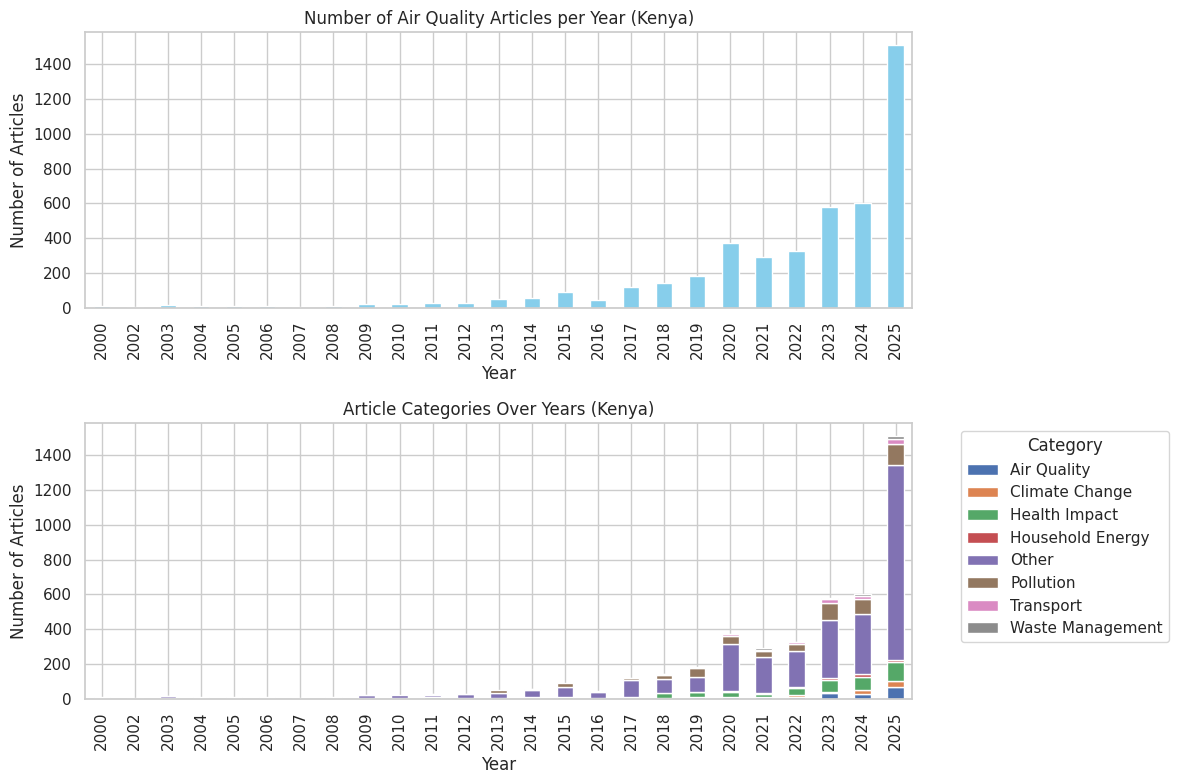


Category Distribution:
category
Other               3011
Pollution            564
Health Impact        444
Air Quality          172
Transport            117
Climate Change        91
Household Energy      59
Waste Management      42
Name: count, dtype: int64

Sample Articles from Each Category:

Pollution:
                                                                            clean_title  year
         breathing air death coal dust pollution plagues mombasa residents daily nation  2024
environmentalists raise concern air pollution chokes cities towns protests daily nation  2024
                                   pollution world like future generations daily nation  2021

Transport:
                                                        clean_title  year
     comes kenyas first locally assembled electric bus daily nation  2023
nairobis quiet revolution transition electric vehicles daily nation  2023
                                  vehicles pollute air daily nation  2024

Househo

In [15]:
## CLASSIFICATION FOR EACH COUNTRY
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
df = pd.read_csv('all_countries_grouped_articles.csv')

# Check unique countries (though we already know they're all Kenya)
print("Unique countries in dataset:", df['country'].unique())

# Extract year from published date
df['published'] = pd.to_datetime(df['published'])
df['year'] = df['published'].dt.year

# Simple classification based on title keywords
def classify_article(title):
    title = title.lower()
    if 'pollution' in title:
        return 'Pollution'
    elif 'air quality' in title or 'dust' in title:
        return 'Air Quality'
    elif 'health' in title or 'disease' in title or 'mortality' in title:
        return 'Health Impact'
    elif 'climate' in title:
        return 'Climate Change'
    elif 'vehicle' in title or 'transport' in title or 'bus' in title:
        return 'Transport'
    elif 'cooking' in title or 'fuel' in title or 'stove' in title:
        return 'Household Energy'
    elif 'waste' in title or 'burning' in title:
        return 'Waste Management'
    else:
        return 'Other'

df['category'] = df['clean_title'].apply(classify_article)

# Analyze yearly trends
yearly_trends = df.groupby(['year', 'category']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))

# Plot 1: Articles per year
plt.subplot(2, 1, 1)
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Air Quality Articles per Year (Kenya)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

# Plot 2: Categories over years
plt.subplot(2, 1, 2)
yearly_trends.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Article Categories Over Years (Kenya)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Show category distribution
print("\nCategory Distribution:")
print(df['category'].value_counts())

# Show sample articles from each category
print("\nSample Articles from Each Category:")
for category in df['category'].unique():
    print(f"\n{category}:")
    print(df[df['category'] == category][['clean_title', 'year']].head(3).to_string(index=False))

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Load data
df = pd.read_csv("all_countries_grouped_articles.csv")
df['published'] = pd.to_datetime(df['published'], errors='coerce')
df['year'] = df['published'].dt.year

# Classification function (tweaked for your 3 countries)
def classify_article(title):
    t = title.lower()
    if 'pollution' in t:
        return 'Pollution'
    elif 'air quality' in t:
        return 'Air Quality'
    elif 'health' in t or 'disease' in t or 'mortality' in t:
        return 'Health Impact'
    elif 'climate' in t:
        return 'Climate Change'
    elif 'vehicle' in t or 'transport' in t or 'bus' in t or 'ulez' in t:
        return 'Transport'
    elif 'cooking' in t or 'fuel' in t or 'stove' in t:
        return 'Household Energy'
    elif 'waste' in t or 'burning' in t:
        return 'Waste Management'
    else:
        return 'Other'

df['category'] = df['clean_title'].apply(classify_article)

# Calculate overall category order
overall_category_counts = df['category'].value_counts()
category_order = overall_category_counts.index.tolist()

# ====== EXPORT STEP ======
# Save sorted overall counts
overall_category_counts.to_csv("overall_category_counts.csv")

# Save per-country counts sorted by category order
country_category_counts = (
    df.groupby(['country', 'category'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=category_order)
)
country_category_counts.to_csv("category_counts_per_country.csv")

# Save per-country percentages
category_percentages_per_country = (
    country_category_counts.div(country_category_counts.sum(axis=1), axis=0) * 100
)
category_percentages_per_country.to_csv("category_percentages_per_country.csv")

# ====== VISUALIZATION SETTINGS ======
sns.set_theme(style="whitegrid")
country_palette = {
    "Kenya": "#1b9e77",
    "South Africa": "#d95f02",
    "UK": "#7570b3"
}

# 1️⃣ Stacked bar plots per country over years
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    yearly_trends = (
        country_data.groupby(['year', 'category'])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=category_order)
    )

    ax = yearly_trends.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        colormap='tab20'
    )
    plt.title(f"Article Categories Over Years ({country})", fontsize=14, weight='bold')
    plt.ylabel("Number of Articles")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.savefig(f"{country.lower().replace(' ', '_')}_stacked_trends.png", dpi=300)
    plt.close()

# 2️⃣ Overall category distribution
plt.figure(figsize=(8, 6))
overall_category_counts.loc[category_order].plot(kind='bar', color='skyblue')
plt.title("Overall Category Distribution Across All Countries", fontsize=14, weight='bold')
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("overall_category_distribution.png", dpi=300)
plt.close()

# 3️⃣ Grouped bar chart for percentage comparison
ax = category_percentages_per_country.T.plot(
    kind='bar',
    figsize=(12, 6),
    color=[country_palette[c] for c in category_percentages_per_country.index]
)

plt.title("Category Percentage Comparison by Country", fontsize=14, weight='bold')
plt.ylabel("Percentage of Articles (%)")
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.1f}%",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("category_percentage_comparison.png", dpi=300)
plt.close()


**RESULTS**



We selected media houses that had both print and digital media.
For Kenya's daily nation, some articles required subscription to access or read. Many of these smaller articles, which is where air pollution and health articles fall, do not make it to print media nor are they translated. Therefore, visibility is limited to those who have internet and can afford the daily or yearly subscriptions.

**Comparison of the three countries. **
There are clear patterns in the titles and areas of focus when it comes to air quality and health.
**Kenya**
The articles focus on


** Discussion. **
Whoever communication is being left to greatly impacts the view of the public about issues. Climate change has been a controversial topic of communication since it came up, with a good divide between people who believe it and those who do not. Prominent leaders like the US president shutting down places like NOAAA, and department of environment, such big moves have definitely had an impact on people's views on the importance of the issue.

The media plays a crucial role in shaping peoples views and beliefs. The style of writing and communication, the extent of details and more, all shape information made available and what people believe and know. the UK add links to quoted research, allowing people to further read about the research and get more information. Kenya's news rely more on paraphrased research without links to articles or other resources.

There's the issue of watered

In [ ]:
all_articles = pd.read_csv("all_countries_grouped_articles.csv")
all_articles